In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Задание 1

## Harris Corner Detector in OpenCV 

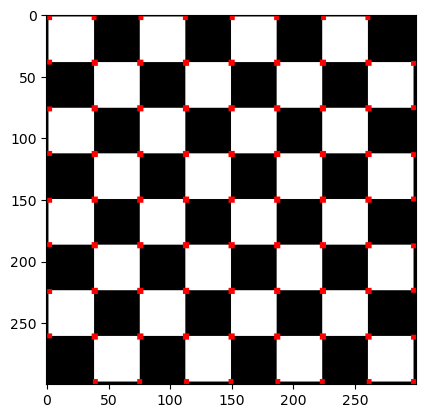

In [9]:
img = cv.imread("D:/PyProjects/SLAM_Algorithms/SLAM-Algorithms/Lab_3/data/board.png")
img = cv.resize(img, (300, 300), interpolation=cv.INTER_LINEAR)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Corner with SubPixel Accuracy 

C:\Users\Alexander\AppData\Local\Temp\ipykernel_6116\2153019231.py:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


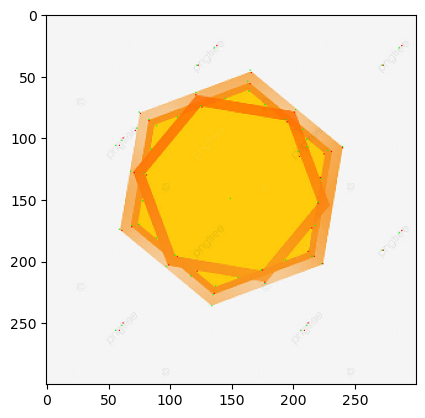

In [11]:
img = cv.imread("D:/PyProjects/SLAM_Algorithms/SLAM-Algorithms/Lab_3/data/polygon.png")
img = cv.resize(img, (300, 300), interpolation=cv.INTER_LINEAR)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Задание 2

## Shi-Tomasi Corner Detector & Good Features to Track

C:\Users\Alexander\AppData\Local\Temp\ipykernel_6116\2954721315.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


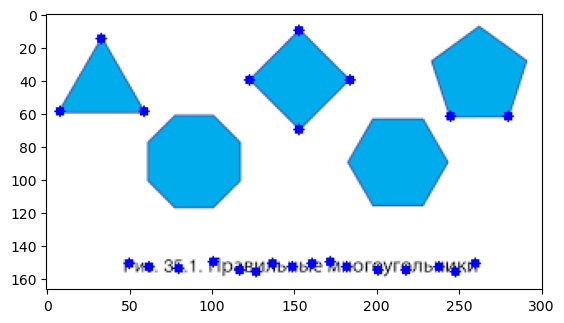

In [12]:
img = cv.imread("D:/PyProjects/SLAM_Algorithms/SLAM-Algorithms/Lab_3/data/polygons.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))